# Data extraction

## Some sources to extract data


###  1.-  Dayli data from all coins available at: https://coinmarketcap.com/coins/ with the function below
###  2.-  Hourly and daily data in csv format from some coins abailable at: https://www.cryptodatadownload.com/data/ 

In [1]:
import pandas as pd

In [2]:
# scrapping first 200 coins names available

url = 'https://coinmarketcap.com/coins/views/all/'
dfs = pd.read_html(url)
df = dfs[2]
df.head()

,Rank,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24h),% 1h,% 24h,% 7d,Unnamed: 10
0,1,Bitcoin,BTC,"$217,143,686,258","$11,765.30","18,456,275 BTC","$17,734,311,192",0.34%,0.14%,5.66%,NaN
1,2,Ethereum,ETH,"$44,110,736,961",$393.44,"112,115,341 ETH","$8,918,428,027",0.03%,-0.88%,3.87%,NaN
2,3,XRP,XRP,"$13,018,873,199",$0.290194,"44,862,646,997 XRP *","$1,385,793,121",0.19%,-2.06%,-0.73%,NaN
3,4,Bitcoin Cash,BCH,"$5,617,716,967",$303.90,"18,485,388 BCH","$1,606,112,024",0.55%,-1.08%,5.63%,NaN
4,5,Bitcoin SV,BSV,"$4,174,628,477",$225.85,"18,484,177 BSV","$1,212,340,587",0.30%,-3.03%,2.95%,NaN


In [3]:
df.Price = df['Price'].apply(lambda x: float(x.replace('$','').replace(',','')))
df.sort_values(by=['Price'], inplace=True, ascending=False)

In [4]:
import plotly.express as px

fig = px.bar(df, y='Price', x='Name', text='Name')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
#fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [5]:
coins_available = list(df.Name)

In [6]:
len(coins_available)

200

In [7]:
# Yes I know there are better ways to do that

coins_available = [(coin.lower()).replace(' ','-').replace('.','-').replace('[','').replace(']','').replace('#','') for coin in coins_available]

In [8]:
print(coins_available)

['bitcoin', 'ethereum', 'bitcoin-cash', 'bitcoin-sv', 'dash', 'monero', 'zcash', 'bitcoinpos', 'unobtanium', 'litecoin', 'bonorum', 'obyte', 'binance-coin', 'counos-x', 'salus', 'decred', 'kusama', 'neo', 'energy-web-token', 'mimblewimblecoin', 'horizen', 'bitcoin-gold', 'newyork-exchange', 'largo-coin', 'zcoin', 'ethereum-classic', 'cosmos', 'platincoin', 'bitcoinhd', 'counos-coin', 'ddkoin', 'tezos', 'chainx', 'eos', 'solana', 'qtum', 'ghostprism', 'energi', 'clams', 'elastos', 'vitae', 'celo', 'waves', 'monacoin', 'btse', 'cryptonex', 'haven-protocol', 'zenon', 'factom', 'lisk', 'hypercash', 'blocknet', 'tomochain', 'dero', 'nano', 'stakecubecoin', 'deviantcoin', 'bitcoin-diamond', 'ontology', 'polis', 'particl', 'komodo', 'bhpcoin', 'baer-chain', 'zano', 'loki', 'skycoin', 'neblio', 'bitcoin-2', 'insolar', 'grin', 'stratis', 'fusion', 'gxchain', 'beam', 'ouroboros', 'aidos-kuneen', 'aeon', 'ark', 'nuls', 'stakenet', 'pivx', 'nebulas', 'terra', 'algorand', 'namecoin', 'icon', 'ergo'

## Function to obtain some data coins at: https://coinmarketcap.com/coins/



In [9]:
# Libraries
import urllib.request as urllib2
from bs4 import BeautifulSoup
import datetime 
import csv

In [ ]:
'''coins_available = ['bitcoin','ethereum','xrp','bitcoin-cash','bitcoin-sv','litecoin','cardano','binance-coin','eos','tezos','stellar','monero','tron','vechain',
                   'neo','ethereum-classic','dash','zcash','iota','cosmos','nem','ontology','dogecoin','digibyte','theta','qtum','algorand','hedera-hashgraph',
                   'icon','decred','zilliqa','bitcoin-gold','waves','bitcoin-diammond','lisk','ravencoin','siacoin','nano','monacoin','terra','bytom','nervos-network',
                   'divi','verge','blockstack','horizen','iost','komodo','steem','abbc-coin','bitshares','zcoin','hive','energi','tomochain','hypercash','ark',
                   'xinfin-network','syscoin','wax','velas','ardor','irisnet','aeternity','v-systems','stratis','elastos','harmony','electroneum','aion','super-zero-protocol',
                   'nimiq','nuls','waykichain','bytecoin','reddcoin','wanchain','gxchain','theta-fuel','iotex','kusama','thunder-token','project-pai','solana','loki',
                   'cortex','beam','fusion','truechain','pivx','grin','insolar','nebulas','coti','counos-x','bitcoinpos','celo','largo-coin','mimblewimblecoin',
                   'advanced-internet-blocks']'''

In [25]:
# ► Function 

def get_data(coins_available):
 
  '''This gunction gives general data from a coin name'''

  # ► User types a number

  print(coins_available)

  coin_name = input('Type a valid coin name: ').lower()

  while True:

    if coin_name not in coins_available:
      print('Coin name should not contain spaces instead use "-" and type all in lowecase')
      coin_name = input('Type again a valid coin name: ').lower()
    else:
      break
  
  # ► Scrapping any coin from
  today = datetime.date.today()  # todays date
  mktcap_page = 'https://coinmarketcap.com/currencies/'+ coin_name +'/historical-data/?start=20130428&amp;end='+"{:%Y%m%d}".format(today)
  page = urllib2.urlopen(mktcap_page)
  soup = BeautifulSoup(page, 'html.parser')
  table = soup.find("table")
  headings = [th.get_text().strip() for th in table.find("tr").find_all("th")]
  headings = [x.replace('*','') for x in headings]

  datasets = []

  for row in soup.find_all("tr")[1:]:
      dataset = dict(zip(headings, (tr.get_text() for tr in row.find_all("td"))))
      if len(dataset) > 1:
          datasets.append(dataset)

  my_df = pd.DataFrame(datasets)
  full_data = my_df


  # ► This function replaces ',' for nothing and then changes data type object to float

  def obj_to_num(df,cols):
      
      def obj_to_num(row):
          if ',' in str(row):
            row = row.replace(',','')
            return float(row)
          else:
            return float(row)

      for col in cols:     
          df[col] = df[col].apply(obj_to_num) 
      return df

  # ► This function changes data column (object) to timestamp[ns] and also can change all dataframe clumns to float 

  def prepare_data(file):
  
    columns = ['Open','High','Low','Close','Volume','Market Cap']
    file['Date'] = pd.to_datetime(file['Date'])
    num_data = obj_to_num(file,columns)

    return num_data

  return prepare_data(full_data)


## Coin exploration

In [26]:
my_coin = get_data(coins_available)

['bitcoin', 'ethereum', 'bitcoin-cash', 'bitcoin-sv', 'dash', 'monero', 'zcash', 'bitcoinpos', 'unobtanium', 'litecoin', 'bonorum', 'obyte', 'binance-coin', 'counos-x', 'salus', 'decred', 'kusama', 'neo', 'energy-web-token', 'mimblewimblecoin', 'horizen', 'bitcoin-gold', 'newyork-exchange', 'largo-coin', 'zcoin', 'ethereum-classic', 'cosmos', 'platincoin', 'bitcoinhd', 'counos-coin', 'ddkoin', 'tezos', 'chainx', 'eos', 'solana', 'qtum', 'ghostprism', 'energi', 'clams', 'elastos', 'vitae', 'celo', 'waves', 'monacoin', 'btse', 'cryptonex', 'haven-protocol', 'zenon', 'factom', 'lisk', 'hypercash', 'blocknet', 'tomochain', 'dero', 'nano', 'stakecubecoin', 'deviantcoin', 'bitcoin-diamond', 'ontology', 'polis', 'particl', 'komodo', 'bhpcoin', 'baer-chain', 'zano', 'loki', 'skycoin', 'neblio', 'bitcoin-2', 'insolar', 'grin', 'stratis', 'fusion', 'gxchain', 'beam', 'ouroboros', 'aidos-kuneen', 'aeon', 'ark', 'nuls', 'stakenet', 'pivx', 'nebulas', 'terra', 'algorand', 'namecoin', 'icon', 'ergo'

In [27]:
my_coin.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2020-08-09,98.23,98.98,95.47,97.64,314807530.0,941794718.0
1,2020-08-08,96.99,102.12,95.18,98.07,355970818.0,945779285.0
2,2020-08-07,100.58,103.48,94.02,96.96,520518652.0,934921558.0
3,2020-08-06,92.32,104.35,90.74,100.56,621631646.0,969424514.0
4,2020-08-05,86.88,93.17,86.32,92.34,370531018.0,890091986.0


In [34]:
my_coin.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Market Cap           float64
dtype: object

In [37]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=my_coin['Date'], y=my_coin['Open'],
                    mode='lines',
                    name='Open'))
fig.add_trace(go.Scatter(x=my_coin['Date'], y=my_coin['High'],
                    mode='lines',
                    name='High'))
fig.add_trace(go.Scatter(x=my_coin['Date'], y=my_coin['Low'],
                    mode='lines',
                    name='Low'))
fig.add_trace(go.Scatter(x=my_coin['Date'], y=my_coin['Close'],
                    mode='lines',
                    name='Close'))

fig.show()

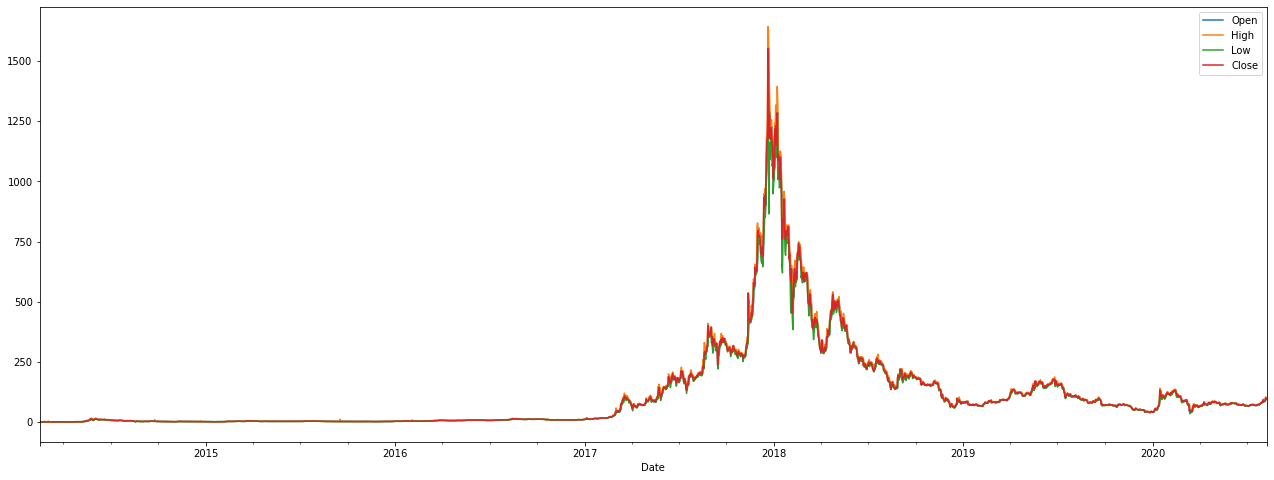

In [38]:
my_coin_graph = my_coin.set_index('Date') 
_ = my_coin_graph[['Open','High','Low','Close']].plot(figsize=(22, 8))